In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df_demo = pd.read_csv("../data/part1/Demographics.csv")

In [4]:
df_demo.set_index('Ethnicity',inplace=True)
df_demo

,ID,Age,Sex,IMD
Ethnicity,,,,
Black,pk1,73.0,Male,5
Black,pk2,65.0,Female,5
White,pk3,29.0,Male,4
White,pk4,91.0,Male,3
White,pk5,56.0,Male,6
...,...,...,...,...
White,pk99996,75.0,Female,6
NaN,pk99997,50.0,Male,2
White,pk99998,65.0,Male,4


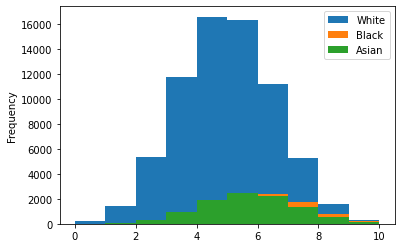

In [5]:
df_demo.loc['White']['IMD'].plot.hist(label='White',bins=range(0,11))
df_demo.loc['Black']['IMD'].plot.hist(label='Black',bins=range(0,11))
df_demo.loc['Asian']['IMD'].plot.hist(label='Asian',bins=range(0,11))
plt.legend()

In [6]:
df_serology = pd.read_csv("../data/part1/Serology.csv").set_index('ID')
df_serology

,Date,IgG
ID,,
pk66918,2021-10-22,57.527970
pk31837,2020-10-26,1.272219
pk7758,2021-02-03,88.152483
pk63516,2020-04-05,54.555844
pk11931,2022-11-19,29.283914
...,...,...
pk34880,2021-04-10,44.055308
pk14992,2021-03-16,68.023008
pk61353,2021-05-25,20.857946


In [11]:
df_gp = pd.read_csv("../data/part1/GP_Records.csv").set_index('ID')
df_gp

,date_of_visit,comorbidity,comorbidity_value
ID,,,
pk1,2010-11-13,BMI,72.592461
pk1,2010-11-13,Diabetes Type-II,1.000000
pk1,2010-11-13,Mental Health,1.000000
pk10,2008-05-26,BMI,9.006752
pk10,2008-05-26,Mental Health,1.000000
...,...,...,...
pk99997,2012-02-25,BMI,11.862120
pk99998,2011-07-10,BMI,3.339157
pk99998,2011-07-10,Heart Condition,1.000000


In [25]:
df_ana = df_demo.reset_index().set_index('ID').join(df_gp.reset_index()[['ID','comorbidity']].groupby('ID').count())
df_ana['comorbidity'].fillna(0,inplace=True)
df_ana

,Ethnicity,Age,Sex,IMD,comorbidity
ID,,,,,
pk1,Black,73.0,Male,5,3.0
pk2,Black,65.0,Female,5,0.0
pk3,White,29.0,Male,4,1.0
pk4,White,91.0,Male,3,3.0
pk5,White,56.0,Male,6,2.0
...,...,...,...,...,...
pk99996,White,75.0,Female,6,2.0
pk99997,NaN,50.0,Male,2,1.0
pk99998,White,65.0,Male,4,3.0


In [30]:
df_counts = df_ana[['Ethnicity','comorbidity']].value_counts().to_frame().sort_index()
df_counts

0
Ethnicity comorbidity       
Asian     0.0            973
          1.0           2118
          2.0           3892
          3.0           2410
          4.0            573
          5.0             48
Black     0.0            917
          1.0           2175
          2.0           3998
          3.0           2335
          4.0            585
          5.0             42
White     0.0           7168
          1.0          14988
          2.0          27395
          3.0          16194
          4.0           3989
          5.0            318

In [39]:
df_temp = df_counts.reset_index()[['Ethnicity',0]].groupby('Ethnicity').sum()
df_temp

,0
Ethnicity,
Asian,10014
Black,10052
White,70052


In [41]:
df_counts / df_temp

0
Ethnicity comorbidity          
Asian     0.0          0.097164
          1.0          0.211504
          2.0          0.388656
          3.0          0.240663
          4.0          0.057220
          5.0          0.004793
Black     0.0          0.091226
          1.0          0.216375
          2.0          0.397732
          3.0          0.232292
          4.0          0.058197
          5.0          0.004178
White     0.0          0.102324
          1.0          0.213955
          2.0          0.391067
          3.0          0.231171
          4.0          0.056943
          5.0          0.004539

In [7]:
df_ana = df_serology.join(df_demo.reset_index().set_index('ID'))
df_ana

,Date,IgG,Ethnicity,Age,Sex,IMD
ID,,,,,,
pk100,2022-09-04,40.802187,White,60.0,Male,5
pk100,2022-09-16,39.439905,White,60.0,Male,5
pk10000,2022-04-04,19.989040,Black,79.0,Male,6
pk10005,2022-08-13,19.444122,NaN,43.0,Female,4
pk10005,2022-04-12,134.444875,NaN,43.0,Female,4
...,...,...,...,...,...,...
pk99978,2022-04-05,54.040861,White,36.0,Male,3
pk99978,2021-10-08,25.235217,White,36.0,Male,3
pk99987,2021-12-23,53.472139,White,60.0,Female,2


In [8]:
import numpy as np

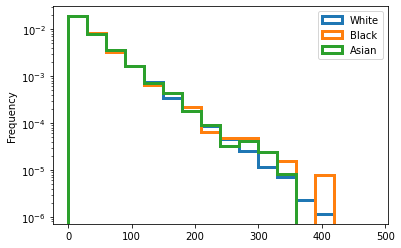

In [9]:
fig,ax = plt.subplots()
stats = {}
for eth in df_ana['Ethnicity'].unique():
    if eth != eth:
        continue
    data = df_ana[df_ana['Ethnicity'] == eth]['IgG']
    data.plot.hist(ax=ax,bins=range(0,500,30),histtype='step',lw=3,density=True,label=eth)
    stats[eth] = {'mean':data.mean(),'std':data.std()}
    
ax.set_yscale('log')
ax.legend()
plt.show();

In [10]:
stats

{'White': {'mean': 37.13850930575294, 'std': 38.96888807075155},
 'Black': {'mean': 37.73803500138657, 'std': 40.4212328708418},
 'Asian': {'mean': 38.00580032775802, 'std': 39.96596478721224}}